In [751]:
# IMPORT Libararies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import pyodbc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import f_oneway 

In [752]:
# connect with SQL DB
conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-3R2HVDJ\\SQLEXPRESS;"
    "Database=cucasDWH;"
    "Trusted_Connection=yes;"
)
print(" Connected successfully to SQL Server cucasDWH")


 Connected successfully to SQL Server cucasDWH


In [753]:
#  Read the views
df = pd.read_sql("SELECT * FROM gold.ScholarshipDIM", conn)


C:\Users\m\AppData\Local\Temp\ipykernel_11744\610738025.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM gold.ScholarshipDIM", conn)


In [754]:
df.head()

,ScholarshipKey,Schol_ID,Program,TeachingLanguage,Degree,Duration,DurationCategoryType,StartMonth,StartYear,StartingDate,...,MaxApplicantNeedToPayAccommodation,ApplicantNeedToPayAccommodationCategoryType,MinApplicantNeedToPayLivingExpense,MaxApplicantNeedToPayLivingExpense,LivingExpenseApplicantNeedToPayCategoryType,Tuition,TuitionCategoryType,DeadlineForPayment,MinApplicationServiceFeeByDollars,MaxApplicationServiceFeeByDollars
0,1,1,Physics,English,Doctoral,4,Year,9,2026,2026-09-01,...,1000.0,Month,0.0,1500.0,In Total,42000.0,Year,2025-09-30,500.0,1000.0
1,2,2,Urban-Rural Planning,English,Doctoral,4,Year,9,2026,2026-09-01,...,1000.0,Month,0.0,1500.0,In Total,42000.0,Year,2025-09-30,500.0,1000.0
2,3,3,Architecture,English,Doctoral,4,Year,9,2026,2026-09-01,...,1000.0,Month,0.0,1500.0,In Total,42000.0,Year,2025-09-30,500.0,1000.0
3,4,4,Mathematics,English,Doctoral,4,Year,9,2026,2026-09-01,...,1000.0,Month,0.0,1500.0,In Total,42000.0,Year,2025-09-30,500.0,1000.0
4,5,5,Mechanical Engineering,English,Doctoral,4,Year,9,2026,2026-09-01,...,1000.0,Month,0.0,1500.0,In Total,42000.0,Year,2025-09-30,500.0,1000.0


In [755]:
for col in df.columns:
    print(col)


ScholarshipKey
Schol_ID
Program
TeachingLanguage
Degree
Duration
DurationCategoryType
StartMonth
StartYear
StartingDate
Category
University
Rating
Location
MinScholarshipCoverageTuition
MaxScholarshipCoverageTuition
ScholarshipCoverageAccommodation
ScholarshipCoverageLivingExpense
MinTuitionApplicantNeedToPay
MaxTuitionApplicantNeedToPay
MinApplicantNeedToPayAccommodation
MaxApplicantNeedToPayAccommodation
ApplicantNeedToPayAccommodationCategoryType
MinApplicantNeedToPayLivingExpense
MaxApplicantNeedToPayLivingExpense
LivingExpenseApplicantNeedToPayCategoryType
Tuition
TuitionCategoryType
DeadlineForPayment
MinApplicationServiceFeeByDollars
MaxApplicationServiceFeeByDollars


In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8496 entries, 0 to 8495
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ScholarshipKey                               8496 non-null   int64  
 1   Schol_ID                                     8496 non-null   int64  
 2   Program                                      8496 non-null   object 
 3   TeachingLanguage                             8496 non-null   object 
 4   Degree                                       8496 non-null   object 
 5   Duration                                     8496 non-null   int64  
 6   DurationCategoryType                         8496 non-null   object 
 7   StartMonth                                   8496 non-null   int64  
 8   StartYear                                    8496 non-null   int64  
 9   StartingDate                                 8496 non-null   object 
 10  

In [757]:
df.describe()

,ScholarshipKey,Schol_ID,Duration,StartMonth,StartYear,Rating,MinScholarshipCoverageTuition,MaxScholarshipCoverageTuition,MinTuitionApplicantNeedToPay,MaxTuitionApplicantNeedToPay,MinApplicantNeedToPayAccommodation,MaxApplicantNeedToPayAccommodation,MinApplicantNeedToPayLivingExpense,MaxApplicantNeedToPayLivingExpense,Tuition,MinApplicationServiceFeeByDollars,MaxApplicationServiceFeeByDollars
count,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000
mean,4248.500000,4248.500000,3.523070,8.701860,2025.971634,3.242455,22874.684322,29556.489642,2006.733286,8985.428908,1487.737877,2538.014477,863.338865,1106.006003,28692.919021,498.940678,999.293785
std,2452.728277,2452.728277,0.654722,1.271122,0.192919,1.690482,13371.723362,26172.304207,5823.601751,15355.976458,2168.561790,4006.730034,699.259234,728.692171,15275.671940,17.796396,11.864264
min,1.000000,1.000000,1.000000,2.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,800.000000
25%,2124.750000,2124.750000,3.000000,9.000000,2026.000000,2.500000,15400.000000,20000.000000,0.000000,0.000000,0.000000,78.000000,0.000000,1000.000000,20000.000000,500.000000,1000.000000
50%,4248.500000,4248.500000,4.000000,9.000000,2026.000000,3.900000,22000.000000,25000.000000,0.000000,0.000000,600.000000,1020.000000,1000.000000,1000.000000,25000.000000,500.000000,1000.000000
75%,6372.250000,6372.250000,4.000000,9.000000,2026.000000,4.300000,30000.000000,36000.000000,0.000000,13000.000000,1750.000000,4000.000000,1500.000000,1500.000000,34000.000000,500.000000,1000.000000
max,8496.000000,8496.000000,6.000000,11.000000,2027.000000,5.000000,242000.000000,280000.000000,90000.000000,229000.000000,15000.000000,36000.000000,2400.000000,3000.000000,229000.000000,500.000000,1000.000000


In [758]:
df.isna().sum()

ScholarshipKey                                 0
Schol_ID                                       0
Program                                        0
TeachingLanguage                               0
Degree                                         0
Duration                                       0
DurationCategoryType                           0
StartMonth                                     0
StartYear                                      0
StartingDate                                   0
Category                                       0
University                                     0
Rating                                         0
Location                                       0
MinScholarshipCoverageTuition                  0
MaxScholarshipCoverageTuition                  0
ScholarshipCoverageAccommodation               0
ScholarshipCoverageLivingExpense               0
MinTuitionApplicantNeedToPay                   0
MaxTuitionApplicantNeedToPay                   0
MinApplicantNeedToPa

In [759]:
# Build target Coulmn
df["Expected_Total_Applicant_Payment"] = (
    (df["MinTuitionApplicantNeedToPay"] + df["MaxTuitionApplicantNeedToPay"]) / 2 +
    (df["MinApplicantNeedToPayAccommodation"] + df["MaxApplicantNeedToPayAccommodation"]) / 2 +
    (df["MinApplicantNeedToPayLivingExpense"] + df["MaxApplicantNeedToPayLivingExpense"]) / 2 +
    (df["MinApplicationServiceFeeByDollars"] + df["MaxApplicationServiceFeeByDollars"]) / 2
)


In [760]:
denominator = df["MaxScholarshipCoverageTuition"] + df["MaxTuitionApplicantNeedToPay"]
denominator = denominator.replace(0, np.nan)

df["Attractiveness_Score"] = (
    df["Rating"] * 0.2 +
    (df["MaxScholarshipCoverageTuition"] / denominator) * 0.4 +
    (1 - (df["Expected_Total_Applicant_Payment"] / df["Expected_Total_Applicant_Payment"].max())) * 0.4
)

df["Attractiveness_Score"] = df["Attractiveness_Score"].fillna(0)


In [761]:
# remove unneccisary coulmns
df = df.drop(columns=[
    'ScholarshipKey',
    'StartingDate',
    'Program',
    'DeadlineForPayment',
    'MinTuitionApplicantNeedToPay',
    'MaxTuitionApplicantNeedToPay',
    'MinApplicantNeedToPayAccommodation',
    'MaxApplicantNeedToPayAccommodation',
    'MinApplicantNeedToPayLivingExpense',
    'MaxApplicantNeedToPayLivingExpense',
    'MinApplicationServiceFeeByDollars',
    'MaxApplicationServiceFeeByDollars',
    'University'  
])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8496 entries, 0 to 8495
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Schol_ID                                     8496 non-null   int64  
 1   TeachingLanguage                             8496 non-null   object 
 2   Degree                                       8496 non-null   object 
 3   Duration                                     8496 non-null   int64  
 4   DurationCategoryType                         8496 non-null   object 
 5   StartMonth                                   8496 non-null   int64  
 6   StartYear                                    8496 non-null   int64  
 7   Category                                     8496 non-null   object 
 8   Rating                                       8496 non-null   float64
 9   Location                                     8496 non-null   object 
 10  

,Schol_ID,TeachingLanguage,Degree,Duration,DurationCategoryType,StartMonth,StartYear,Category,Rating,Location,MinScholarshipCoverageTuition,MaxScholarshipCoverageTuition,ScholarshipCoverageAccommodation,ScholarshipCoverageLivingExpense,ApplicantNeedToPayAccommodationCategoryType,LivingExpenseApplicantNeedToPayCategoryType,Tuition,TuitionCategoryType,Expected_Total_Applicant_Payment,Attractiveness_Score
0,1,English,Doctoral,4,Year,9,2026,Science,4.1,Shenzhen,42000.0,42000.0,Yes,Yes,Month,In Total,42000.0,Year,2000.0,1.613059
1,2,English,Doctoral,4,Year,9,2026,Architecture & Planning,4.1,Shenzhen,42000.0,42000.0,Yes,Yes,Month,In Total,42000.0,Year,2000.0,1.613059
2,3,English,Doctoral,4,Year,9,2026,Architecture & Planning,4.1,Shenzhen,42000.0,42000.0,Yes,Yes,Month,In Total,42000.0,Year,2000.0,1.613059
3,4,English,Doctoral,4,Year,9,2026,Science,4.1,Shenzhen,42000.0,42000.0,Yes,Yes,Month,In Total,42000.0,Year,2000.0,1.613059
4,5,English,Doctoral,4,Year,9,2026,Engineering,4.1,Shenzhen,42000.0,42000.0,Yes,Yes,Month,In Total,42000.0,Year,2000.0,1.613059


In [762]:
# encoding 
# ======  Label Encoding  ======
label_encoder = LabelEncoder()
categorical_cols = [
    "TeachingLanguage",
    "Degree",
    "DurationCategoryType",
    "Category",
    "ScholarshipCoverageAccommodation",
    "ScholarshipCoverageLivingExpense",
    "LivingExpenseApplicantNeedToPayCategoryType",
    "Location",
    "TuitionCategoryType"
    
]

for col in categorical_cols:
    if col in df.columns:
        df[col + "_encoded"] = label_encoder.fit_transform(df[col].astype(str))

# One-Hot Encoding 
onehot_cols = ['ApplicantNeedToPayAccommodationCategoryType']
for col in onehot_cols:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], prefix=col.replace(" ", "_"))


print("Encoding completed successfully.")
df.head()


Encoding completed successfully.


,Schol_ID,TeachingLanguage,Degree,Duration,DurationCategoryType,StartMonth,StartYear,Category,Rating,Location,...,ScholarshipCoverageLivingExpense_encoded,LivingExpenseApplicantNeedToPayCategoryType_encoded,Location_encoded,TuitionCategoryType_encoded,ApplicantNeedToPayAccommodationCategoryType_Day,ApplicantNeedToPayAccommodationCategoryType_In Total,ApplicantNeedToPayAccommodationCategoryType_Month,ApplicantNeedToPayAccommodationCategoryType_Semester,ApplicantNeedToPayAccommodationCategoryType_Term,ApplicantNeedToPayAccommodationCategoryType_Year
0,1,English,Doctoral,4,Year,9,2026,Science,4.1,Shenzhen,...,2,0,33,1,False,False,True,False,False,False
1,2,English,Doctoral,4,Year,9,2026,Architecture & Planning,4.1,Shenzhen,...,2,0,33,1,False,False,True,False,False,False
2,3,English,Doctoral,4,Year,9,2026,Architecture & Planning,4.1,Shenzhen,...,2,0,33,1,False,False,True,False,False,False
3,4,English,Doctoral,4,Year,9,2026,Science,4.1,Shenzhen,...,2,0,33,1,False,False,True,False,False,False
4,5,English,Doctoral,4,Year,9,2026,Engineering,4.1,Shenzhen,...,2,0,33,1,False,False,True,False,False,False


In [763]:
for col in df.columns:
    print(col)


Schol_ID
TeachingLanguage
Degree
Duration
DurationCategoryType
StartMonth
StartYear
Category
Rating
Location
MinScholarshipCoverageTuition
MaxScholarshipCoverageTuition
ScholarshipCoverageAccommodation
ScholarshipCoverageLivingExpense
LivingExpenseApplicantNeedToPayCategoryType
Tuition
TuitionCategoryType
Expected_Total_Applicant_Payment
Attractiveness_Score
TeachingLanguage_encoded
Degree_encoded
DurationCategoryType_encoded
Category_encoded
ScholarshipCoverageAccommodation_encoded
ScholarshipCoverageLivingExpense_encoded
LivingExpenseApplicantNeedToPayCategoryType_encoded
Location_encoded
TuitionCategoryType_encoded
ApplicantNeedToPayAccommodationCategoryType_Day
ApplicantNeedToPayAccommodationCategoryType_In Total
ApplicantNeedToPayAccommodationCategoryType_Month
ApplicantNeedToPayAccommodationCategoryType_Semester
ApplicantNeedToPayAccommodationCategoryType_Term
ApplicantNeedToPayAccommodationCategoryType_Year


In [764]:
# Split Data

y = df['Expected_Total_Applicant_Payment']
X = df.drop(columns=[
    'Expected_Total_Applicant_Payment',
    'Category',
    'TeachingLanguage',
    'Degree',
    'DurationCategoryType',
    'Location',
    'ScholarshipCoverageAccommodation',
    'ScholarshipCoverageLivingExpense',
    'LivingExpenseApplicantNeedToPayCategoryType',
    'TuitionCategoryType',
    'Attractiveness_Score'

])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [765]:
#Try Differant  Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0) # verbose=0 to suppress training output
}
results = []
best_model_name = None
best_model = None
best_r2 = -1

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

    # Getting the best onr
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model
        y_test_pred = y_pred


results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("Compared between Models:")
print(results_df)
print(f"\n Best model is : {best_model_name} (R² = {best_r2:.4f})")

Compared between Models:
               Model          MAE         RMSE  R2 Score
2            XGBoost   367.017342  1993.965966  0.969611
1      Random Forest   255.629903  2064.670529  0.967417
3           CatBoost   515.525277  2526.305773  0.951218
0  Linear Regression  4307.065208  5905.877942  0.733402

 Best model is : XGBoost (R² = 0.9696)


In [766]:
# Evaluate Models
mape = mean_absolute_percentage_error(y_test, y_test_pred)
print("\nEvaluation for Best Model:")
print(f"MAPE: {mape}")
print(f"Percentage Error: {mape * 100:.2f} %")
print(f"Accuracy: {(1 - mape) * 100:.2f} %")



Evaluation for Best Model:
MAPE: 0.08948953560723366
Percentage Error: 8.95 %
Accuracy: 91.05 %


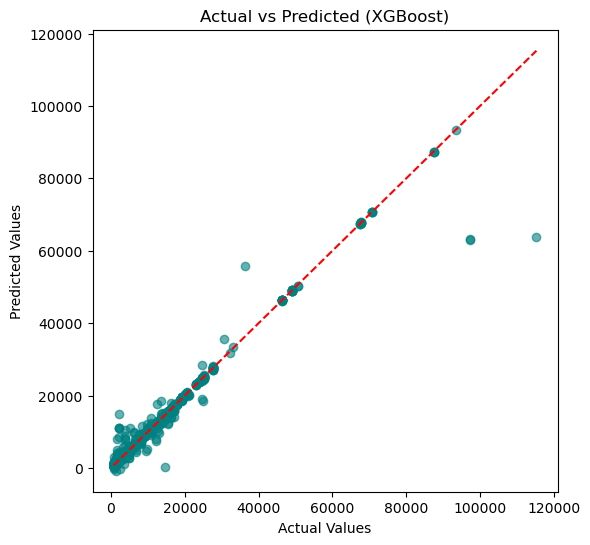

In [767]:
#  Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.show()

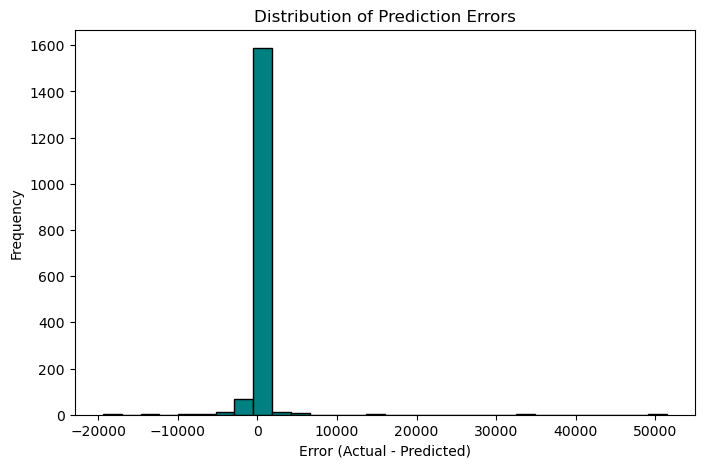

In [768]:
# 2️⃣ Distribution of Errors
errors = y_test - y_test_pred
plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, color='teal', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

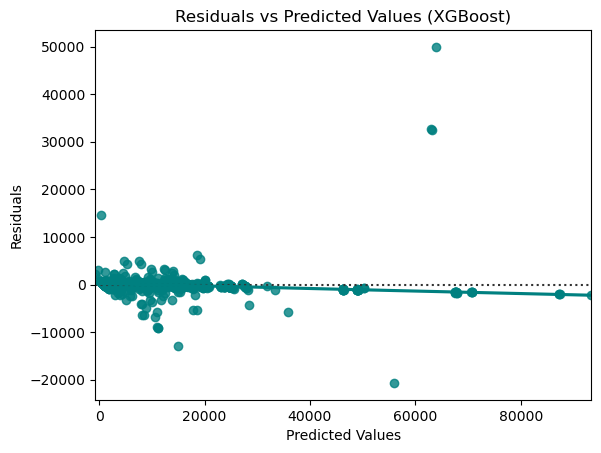

In [769]:
# 3️⃣ Residual Plot
sns.residplot(x=y_test_pred, y=errors, lowess=True, color="teal")
plt.title(f"Residuals vs Predicted Values ({best_model_name})")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


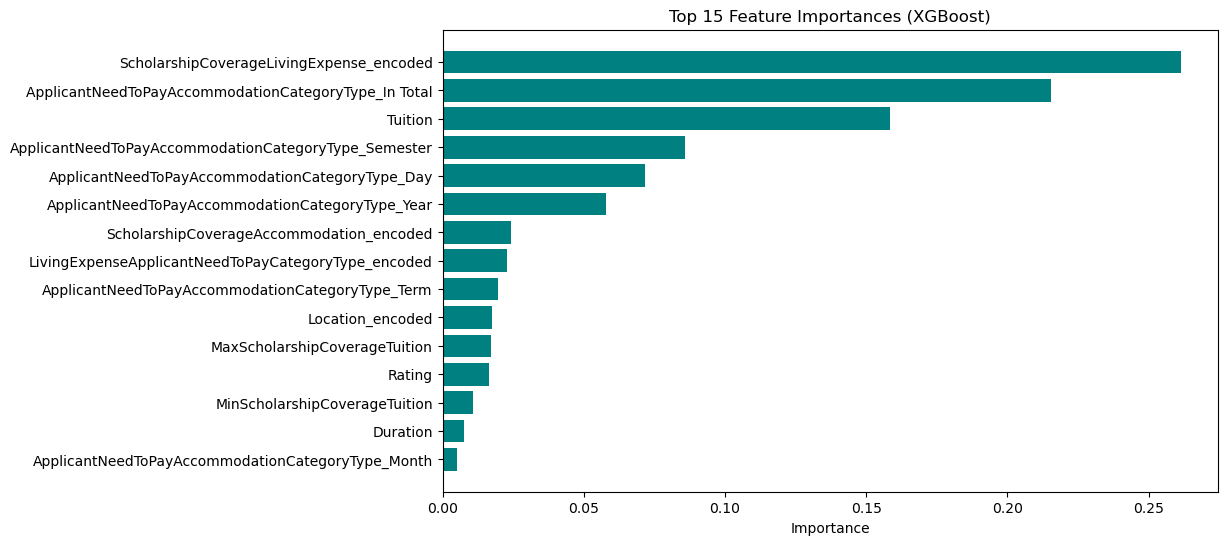

In [770]:
# 4️⃣ Feature Importance
if hasattr(best_model, "feature_importances_"):
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10,6))
    plt.barh(importance['Feature'][:15], importance['Importance'][:15], color='teal')
    plt.gca().invert_yaxis()
    plt.title(f"Top 15 Feature Importances ({best_model_name})")
    plt.xlabel("Importance")
    plt.show()

In [771]:
# Split Data & Remove Unneed,leakage coulmns
leak_cols = [

    'Rating',
    'MaxScholarshipCoverageTuition',
    'MinScholarshipCoverageTuition',
    'MaxTuitionApplicantNeedToPay',
    'MinTuitionApplicantNeedToPay',
    'MaxApplicantNeedToPayAccommodation',
    'MinApplicantNeedToPayAccommodation',
    'MaxApplicantNeedToPayLivingExpense',
    'MinApplicantNeedToPayLivingExpense',
    'MaxApplicationServiceFeeByDollars',
    'MinApplicationServiceFeeByDollars',
    'Expected_Total_Applicant_Payment',
    'ScholarshipCoverageAccommodation',
    'ScholarshipCoverageLivingExpense',
    'LivingExpenseApplicantNeedToPayCategoryType',
    'TuitionCategoryType',
    'ScholarshipCoverageAccommodation_encoded',
    'ScholarshipCoverageLivingExpense_encoded',
    'LivingExpenseApplicantNeedToPayCategoryType_encoded',
    'TuitionCategoryType_encoded'
]
# Target Coulmns 
y_reg = df["Attractiveness_Score"]

X_reg = df.drop(columns=leak_cols + [
    'Attractiveness_Score',
    'Schol_ID',
    'Category',  
    'TeachingLanguage',
    'Degree',
    'DurationCategoryType',
    'Location'
], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [772]:
# Train Model (RandomForestRegressor)
model_reg = RandomForestRegressor(n_estimators=200, random_state=42)
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)



In [773]:
# Evaluate Model
mask = y_test != 0
y_true_safe = y_test[mask]
y_pred_safe = y_pred_reg[mask]


r2 = r2_score(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
mape = np.mean(np.abs((y_true_safe - y_pred_safe) / y_true_safe)) * 100
accuracy = 100 - mape

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R²: 0.898
MAE: 0.0508
MAPE: 4.24%
Accuracy: 95.76%


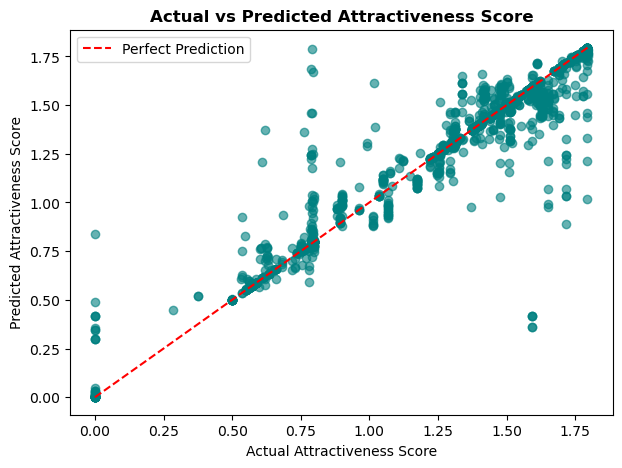

In [774]:
# ----  Actual vs Predicted ----
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_reg, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Attractiveness Score")
plt.ylabel("Predicted Attractiveness Score")
plt.title("Actual vs Predicted Attractiveness Score", fontsize=12, fontweight='bold')
plt.legend()
plt.show()

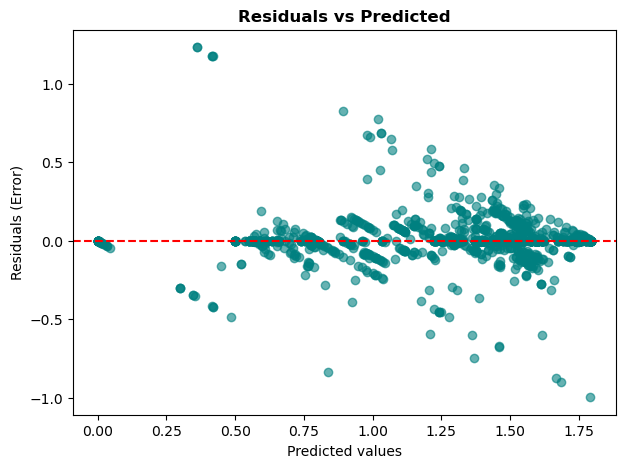

In [775]:
# ----  Residuals vs Predicted ----
residuals = y_test - y_pred_reg
plt.figure(figsize=(7,5))
plt.scatter(y_pred_reg, residuals, alpha=0.6, color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals (Error)")
plt.title("Residuals vs Predicted", fontsize=12, fontweight='bold')
plt.show()

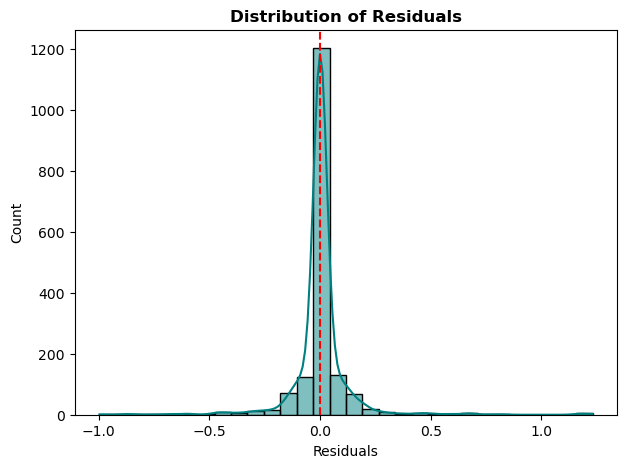

In [776]:
# ----  توزيع الأخطاء (Histogram) ----
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.title("Distribution of Residuals", fontsize=12, fontweight='bold')
plt.show()

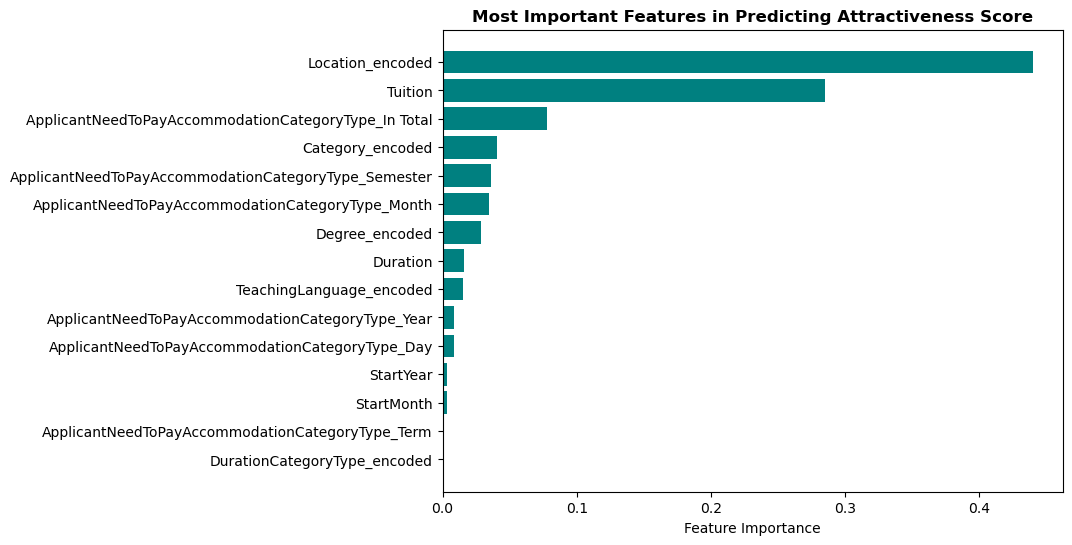

In [777]:
# ---- Feature Importance ----
importances = model_reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center', color='teal')
plt.yticks(range(len(indices)), [X_reg.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Most Important Features in Predicting Attractiveness Score", fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()

In [778]:
# =======Create Classification Target =============
# convert Attractiveness_Score to (Low / Medium / High)
# split values with balanced quantiles

df["Attractiveness_Label"] = pd.qcut(
    df["Attractiveness_Score"],
    q=3,
    labels=["Low", "Medium", "High"]
)

print(df["Attractiveness_Label"].value_counts())

Attractiveness_Label
Medium    3045
Low       2836
High      2615
Name: count, dtype: int64


In [779]:
# Remove Unneed & leakge coulmns 
leak_cols = [
    'Rating',
    'MaxScholarshipCoverageTuition',
    'MinScholarshipCoverageTuition',
    'MaxTuitionApplicantNeedToPay',
    'MinTuitionApplicantNeedToPay',
    'MaxApplicantNeedToPayAccommodation',
    'MinApplicantNeedToPayAccommodation',
    'MaxApplicantNeedToPayLivingExpense',
    'MinApplicantNeedToPayLivingExpense',
    'MaxApplicationServiceFeeByDollars',
    'MinApplicationServiceFeeByDollars',
    'Expected_Total_Applicant_Payment',
    'ScholarshipCoverageAccommodation',
    'ScholarshipCoverageLivingExpense',
    'LivingExpenseApplicantNeedToPayCategoryType',
    'TuitionCategoryType',
    'ScholarshipCoverageAccommodation_encoded',
    'ScholarshipCoverageLivingExpense_encoded',
    'LivingExpenseApplicantNeedToPayCategoryType_encoded',
    'TuitionCategoryType_encoded'
]

#  Define target

y_cls = df["Attractiveness_Label"]
X_cls = df.drop(columns=leak_cols + [
    'Attractiveness_Score',
    'Attractiveness_Label',
    'Schol_ID',
    'Category',
    'TeachingLanguage',
    'Degree',
    'DurationCategoryType',
    'Location'
], errors='ignore')

le = LabelEncoder()
y_encoded = le.fit_transform(y_cls)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [780]:
# Define Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=8,
        subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='mlogloss'
    ),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

#  Train & Evaluate Each Model
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.2f}%")

#  Pick Best Model
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("\n Best Model:", best_model_name)
print("-" * 40)


Random Forest Accuracy: 83.29%


C:\Users\m\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:29:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 90.06%
Logistic Regression Accuracy: 49.12%

 Best Model: XGBoost
----------------------------------------


C:\Users\m\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [781]:
# Evaluate Best Model
y_pred_best = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.84      0.87       523
         Low       0.95      0.95      0.95       568
      Medium       0.86      0.90      0.88       609

    accuracy                           0.90      1700
   macro avg       0.90      0.90      0.90      1700
weighted avg       0.90      0.90      0.90      1700



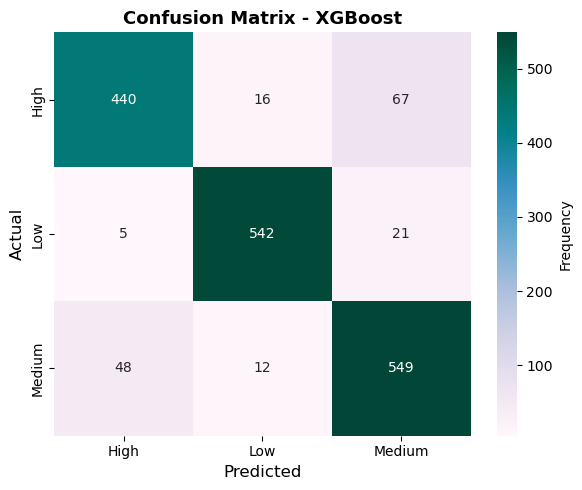

In [782]:
#Confusion Matrix 

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='PuBuGn',  # درجات teal / turquoise
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cbar_kws={'label': 'Frequency'}
)

plt.title(f"Confusion Matrix - {best_model_name}", fontsize=13, weight='bold')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.show()


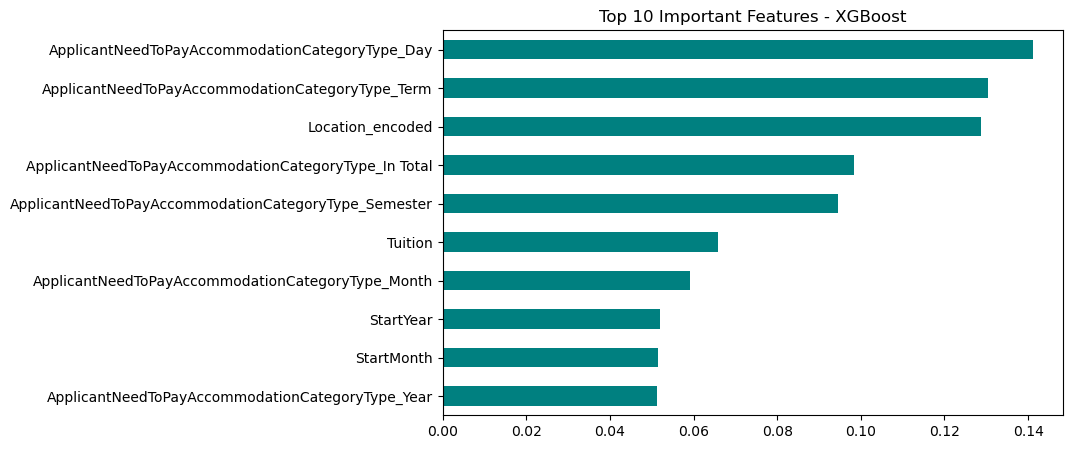

In [783]:
# Feature Importance (لو الموديل يدعمها) =====================
if hasattr(best_model, "feature_importances_"):
    feat_imp = pd.Series(best_model.feature_importances_, index=X_train.columns)
    feat_imp.nlargest(10).sort_values().plot(kind='barh', color='teal', figsize=(8,5))
    plt.title(f"Top 10 Important Features - {best_model_name}")
    plt.show()

In [784]:
# Clustering Scholerships 
features = [
    "TeachingLanguage_encoded",
    "Degree_encoded",
    "DurationCategoryType_encoded",
    "Category_encoded",
    "ScholarshipCoverageAccommodation_encoded",
    "ScholarshipCoverageLivingExpense_encoded",
    "LivingExpenseApplicantNeedToPayCategoryType_encoded",
    "Location_encoded",
    "TuitionCategoryType_encoded",
    "Attractiveness_Score",
    "Expected_Total_Applicant_Payment",
    "Rating"
]

X = df[features].copy()

In [785]:
#  Scale data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

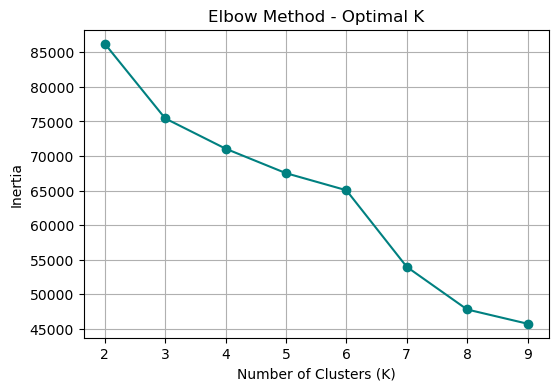

In [786]:
# Find optimal number of clusters (Elbow Method) 
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o', color='teal')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [787]:
# fit model 
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [788]:
print(df.groupby('Cluster')[['Attractiveness_Score','Expected_Total_Applicant_Payment','Rating']].mean())

         Attractiveness_Score  Expected_Total_Applicant_Payment    Rating
Cluster                                                                  
0                    1.585097                       2702.728540  4.048017
1                    1.422482                      14659.517288  3.988385
2                    1.447880                      11960.548857  3.957329
3                    0.619045                       8185.969371  0.458885


In [789]:
# Calculate means and counts per cluster
cluster_summary = df.groupby('Cluster').agg({
    'Attractiveness_Score': 'mean',
    'Expected_Total_Applicant_Payment': 'mean',
    'Rating': 'mean',
    'Schol_ID': 'count'
}).rename(columns={'Schol_ID': 'Number_of_Scholarships'}).round(2)

# Global means for comparison
mean_attr = df['Attractiveness_Score'].mean()
mean_pay = df['Expected_Total_Applicant_Payment'].mean()
mean_rating = df['Rating'].mean()

# Generate an analytical description for each cluster
def describe_cluster(row):
    if row['Attractiveness_Score'] > mean_attr:
        attr_text = "High Attractiveness"
    elif row['Attractiveness_Score'] < mean_attr:
        attr_text = "Low Attractiveness"
    else:
        attr_text = "Average Attractiveness"

    if row['Expected_Total_Applicant_Payment'] < mean_pay:
        pay_text = "Low Cost"
    elif row['Expected_Total_Applicant_Payment'] > mean_pay:
        pay_text = "High Cost"
    else:
        pay_text = "Average Cost"

    if row['Rating'] > mean_rating:
        rate_text = "High Rating"
    elif row['Rating'] < mean_rating:
        rate_text = "Low Rating"
    else:
        rate_text = "Average Rating"

    return f"{attr_text} / {pay_text} / {rate_text}"

# Apply descriptive labels
cluster_summary["Description"] = cluster_summary.apply(describe_cluster, axis=1)

#Reorder columns for clarity
cluster_summary = cluster_summary.reset_index()[[
    'Cluster', 
    'Number_of_Scholarships',
    'Attractiveness_Score', 
    'Expected_Total_Applicant_Payment', 
    'Rating',
    'Description'
]]

#  Display final summary
print("Cluster Summary (Ready for Dashboard):")
display(cluster_summary)


Cluster Summary (Ready for Dashboard):


,Cluster,Number_of_Scholarships,Attractiveness_Score,Expected_Total_Applicant_Payment,Rating,Description
0,0,2295,1.59,2702.73,4.05,High Attractiveness / Low Cost / High Rating
1,1,1851,1.42,14659.52,3.99,High Attractiveness / High Cost / High Rating
2,2,2538,1.45,11960.55,3.96,High Attractiveness / High Cost / High Rating
3,3,1812,0.62,8185.97,0.46,Low Attractiveness / Low Cost / Low Rating


In [790]:
# Save Results into excel 
cluster_descriptions = {
    0: "High Attractiveness / Low Cost / High Rating", # Best value — highly recommended
    1: "High Attractiveness / High Cost / High Rating", # Premium but expensive
    2: "High Attractiveness / High Cost / High Rating", # Premium but expensive 'diff in other features'
    3: "Low Attractiveness / Low Cost / Low Rating" # Least attractive
}

df["Cluster_Description"] = df["Cluster"].map(cluster_descriptions)


output_path = "Scholarships_with_Cluster_Descriptions.xlsx"
df.to_excel(output_path, index=False)

print(f" Excel file created successfully: {output_path}")


 Excel file created successfully: Scholarships_with_Cluster_Descriptions.xlsx


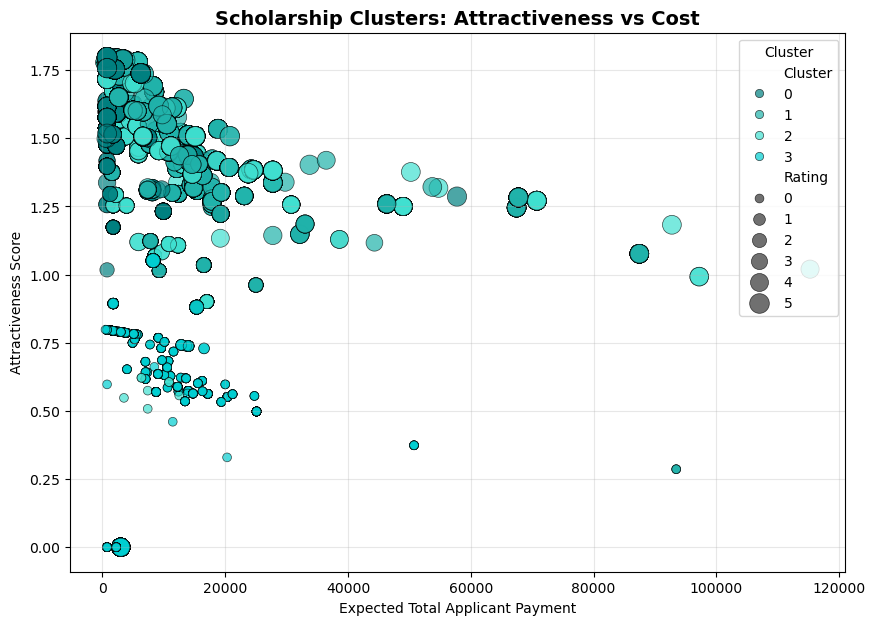

In [791]:
# Attractiveness vs cost
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="Expected_Total_Applicant_Payment",
    y="Attractiveness_Score",
    hue="Cluster",
    palette=["#008080", "#20B2AA", "#40E0D0", "#00CED1"],  # teal shades
    size="Rating",
    sizes=(40, 200),
    alpha=0.7,
    edgecolor="black"
)
plt.title("Scholarship Clusters: Attractiveness vs Cost", fontsize=14, weight="bold")
plt.xlabel("Expected Total Applicant Payment")
plt.ylabel("Attractiveness Score")
plt.legend(title="Cluster", loc="upper right")
plt.grid(alpha=0.3)
plt.show()


C:\Users\m\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\m\AppData\Local\Temp\ipykernel_11744\1371444201.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=col, palette="viridis")


🔍 Top Features that differ most between clusters:
                                              Feature        p_value  \
9                                Attractiveness_Score   0.000000e+00   
16  LivingExpenseApplicantNeedToPayCategoryType_en...   0.000000e+00   
15           ScholarshipCoverageLivingExpense_encoded   0.000000e+00   
14           ScholarshipCoverageAccommodation_encoded   0.000000e+00   
11                                     Degree_encoded   0.000000e+00   
8                    Expected_Total_Applicant_Payment   0.000000e+00   
19                                            Cluster   0.000000e+00   
4                                              Rating   0.000000e+00   
1                                            Duration   0.000000e+00   
5                       MinScholarshipCoverageTuition  7.795112e-303   

    Cluster_0_Mean  Cluster_1_Mean  Cluster_2_Mean  Cluster_3_Mean  \
9         1.585097        1.422482        1.447880        0.619045   
16        0.31416

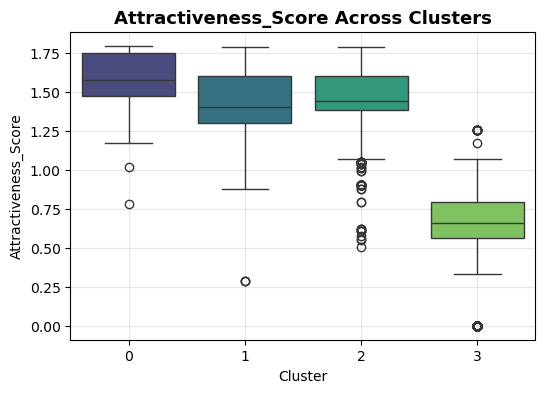

C:\Users\m\AppData\Local\Temp\ipykernel_11744\1371444201.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=col, palette="viridis")


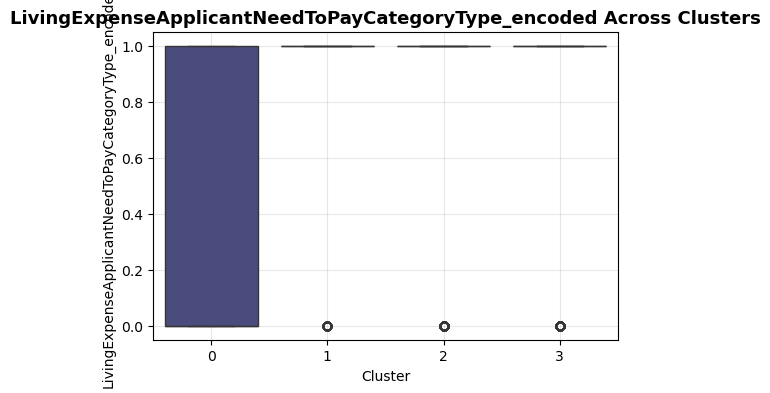

C:\Users\m\AppData\Local\Temp\ipykernel_11744\1371444201.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=col, palette="viridis")


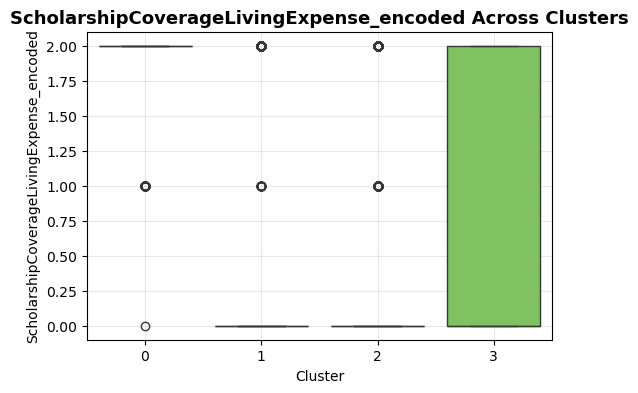

C:\Users\m\AppData\Local\Temp\ipykernel_11744\1371444201.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=col, palette="viridis")


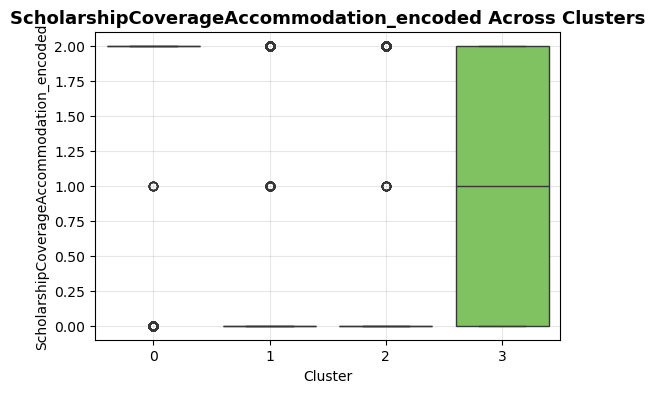

C:\Users\m\AppData\Local\Temp\ipykernel_11744\1371444201.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=col, palette="viridis")


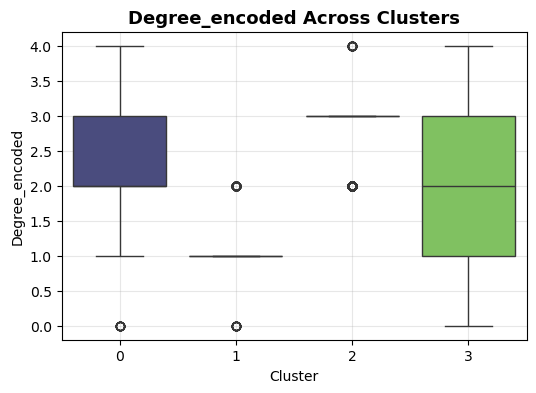

In [792]:
# SHOW THE MOST EFFECTED FEATURES BETWEEN THE CLUSTERS 
num_cols = df.select_dtypes(include=['number']).columns

results = []


for col in num_cols:
    groups = [df[df["Cluster"] == c][col] for c in df["Cluster"].unique()]
    
 
    if any(len(g) < 2 for g in groups):
        continue
        
    try:
        stat, p = f_oneway(*groups)
        results.append({
            "Feature": col,
            "p_value": p,
            "Cluster_0_Mean": df[df["Cluster"] == 0][col].mean(),
            "Cluster_1_Mean": df[df["Cluster"] == 1][col].mean(),
            "Cluster_2_Mean": df[df["Cluster"] == 2][col].mean(),
            "Cluster_3_Mean": df[df["Cluster"] == 3][col].mean(),
        })
    except Exception:
        continue

# Show Results
anova_df = pd.DataFrame(results)
anova_df["Significant_Diff"] = anova_df["p_value"] < 0.05
anova_df = anova_df.sort_values("p_value")

print("🔍 Top Features that differ most between clusters:")
print(anova_df.head(10))

# TOP 5 FEATURES IN DIFFERANCE
top_features = anova_df.head(5)["Feature"]

for col in top_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Cluster", y=col, palette="viridis")
    plt.title(f"{col} Across Clusters", fontsize=13, weight='bold')
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.grid(alpha=0.3)
    plt.show()


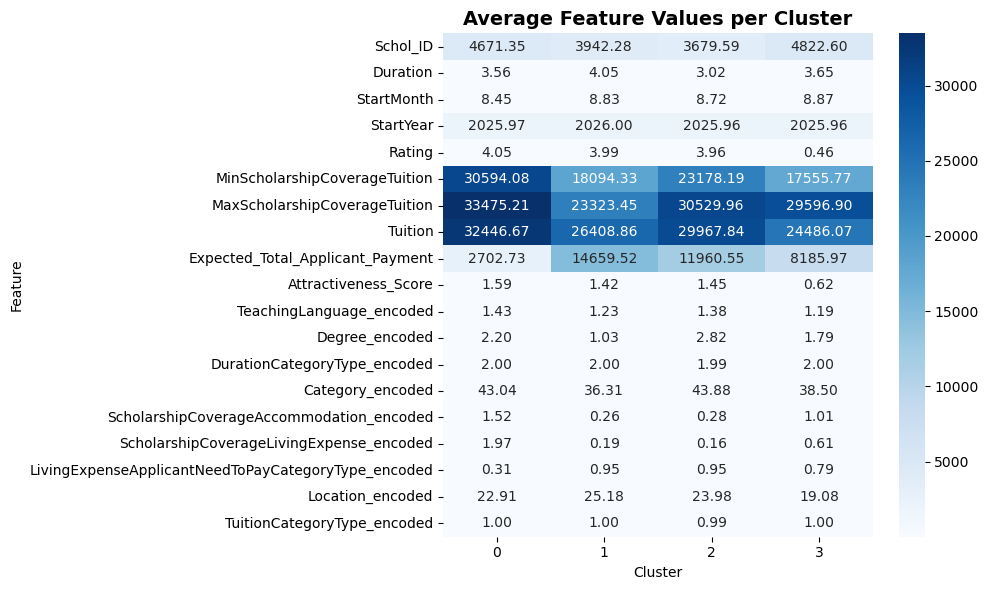

In [860]:
# Heat Map with top 10 imp Features 
df["Cluster"] = df["Cluster"].astype(int)
available_features = df.select_dtypes(include=['number']).columns.tolist()
available_features = [col for col in available_features if col != "Cluster"]
cluster_subset = df[["Cluster"] + available_features].copy()
cluster_means = cluster_subset.groupby("Cluster", as_index=True).mean().T

# نرسم الـ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, cmap="Blues", annot=True, fmt=".2f")
plt.title("Average Feature Values per Cluster", fontsize=14, weight='bold')
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
